This notebook is used for the sole purpose of gathering some information during experiment 2 
The function calls the Mongodb where the information for the hyperopt algorithm is stored. With this code I can check if everything is working as I expected (and checking every 5 min if the accuracy is already improved:)) 

In [ ]:
experiment_date = "6_25"


In [ ]:
from run_experiments.experiment_2 import make_space
from hyperopt import space_eval
from LJT_database.firestore_codes import  add_update, retrieve_updates
import pandas as pd
from hyperopt.mongoexp import MongoTrials
import pymongo
import dns

client = pymongo.MongoClient("mongodb://34.66.233.70:5000/")
mydb = client.eval_db
collection = mydb.jobs

#collection.drop()
   
coin="ETHBTC"
algorithm = "LSTM"
settings_experiment_2 = retrieve_updates(dataset=f"{coin}_{algorithm}_experiments",
                                    document="experiment2_settings")

settings = retrieve_updates(dataset=f"{coin}_{algorithm}_experiments",
                                            document="experiment_general_settings")

space = make_space(settings_experiment_2)

all_data = []
for doc in collection.find():
    if doc["exp_key"] == experiment_date:
        results = doc['result']
        tests = space_eval(space, {key: value[0] for key, value in doc['misc']['vals'].items()})
        data = {**results, **tests}
        data["experiment_date"] = settings["experiment_date"]
        all_data.append(data)

In [2]:
x = pd.DataFrame(all_data)

In [4]:
x.head()

,accuracy_val,activation_function,batch_size,bidrectional,dropout,epochs,experiment_date,f_1_val,highest_train_ac,learning_rate,...,loss_func,neurons,number_layers,optimizer,precision_val,sensitivity_val,specificity_val,status,time_ahead_prediction,window_size
0,NaN,softmax,3300.0,False,0.414157,1100.0,6_27,NaN,NaN,0.000003,...,binary_crossentropy,75,1,rmsprop,NaN,NaN,NaN,new,1,97
1,NaN,softmax,1400.0,False,0.484090,150.0,6_27,NaN,NaN,0.214599,...,binary_crossentropy,75,1,adam,NaN,NaN,NaN,new,1,97
2,NaN,relu,2060.0,False,0.327206,1500.0,6_27,NaN,NaN,0.000156,...,binary_crossentropy,75,1,adam,NaN,NaN,NaN,new,1,97
3,0.521344,softmax,2140.0,False,0.158182,1500.0,6_27,0.298055,0.507719,0.000002,...,binary_crossentropy,75,1,rmsprop,0.475241,0.217109,0.789052,ok,1,97
4,0.531933,tanh,1400.0,False,0.333618,1250.0,6_27,NaN,0.500000,0.211845,...,binary_crossentropy,75,1,adam,NaN,0.000000,1.000000,ok,1,97


In [368]:
print(len(x))
x.sort_values('accuracy_val').iloc[-50:-1]

185


,accuracy_val,activation_function,batch_size,bidrectional,dropout,epochs,experiment_date,f_1_val,highest_train_ac,learning_rate,...,loss_func,neurons,number_layers,optimizer,precision_val,sensitivity_val,specificity_val,status,time_ahead_prediction,window_size
178,0.540989,sigmoid,1720.0,False,0.046078,450.0,6_25,0.513540,0.524511,4.448965e-04,...,binary_crossentropy,75,1,adam,0.509522,0.517621,0.561551,ok,1,97
68,0.541212,sigmoid,2000.0,False,0.195150,950.0,6_25,0.496252,0.522052,6.549002e-04,...,binary_crossentropy,75,1,adam,0.510480,0.482796,0.592614,ok,1,97
73,0.541267,sigmoid,1240.0,False,0.196452,650.0,6_25,0.511034,0.524497,2.891455e-04,...,binary_crossentropy,75,1,adam,0.509928,0.512144,0.566894,ok,1,97
105,0.541825,relu,3000.0,False,0.265846,750.0,6_25,0.479537,0.519164,8.548712e-03,...,binary_crossentropy,75,1,adam,0.511997,0.450947,0.621792,ok,1,97
169,0.541880,sigmoid,1380.0,False,0.237841,850.0,6_25,0.482678,0.522306,1.191229e-03,...,binary_crossentropy,75,1,adam,0.511914,0.456602,0.616920,ok,1,97
71,0.541964,sigmoid,1840.0,False,0.180866,500.0,6_25,0.443082,0.519366,3.118848e-03,...,binary_crossentropy,75,1,adam,0.514153,0.389273,0.676323,ok,1,97
32,0.541992,tanh,3480.0,False,0.429824,350.0,6_25,0.466071,0.518708,1.120892e-02,...,binary_crossentropy,75,1,adam,0.512905,0.427075,0.643112,ok,1,97
14,0.542047,tanh,3040.0,False,0.054084,500.0,6_25,0.375499,0.516566,5.871886e-04,...,binary_crossentropy,75,1,adam,0.519067,0.294142,0.760189,ok,1,97
159,0.542075,softmax,1780.0,False,0.201652,550.0,6_25,0.467949,0.515528,1.761775e-02,...,binary_crossentropy,75,1,adam,0.512917,0.430230,0.640492,ok,1,97
78,0.542883,sigmoid,2340.0,False,0.135172,850.0,6_25,0.446581,0.518875,4.864117e-02,...,binary_crossentropy,75,1,adam,0.515298,0.394035,0.673861,ok,1,97


In [370]:
x.sort_values("loss")[["accuracy_val",'highest_train_ac','optimizer','dropout','activation_function','learning_rate','epochs','batch_size']].head(150)

,accuracy_val,highest_train_ac,optimizer,dropout,activation_function,learning_rate,epochs,batch_size
30,0.549905,0.521554,adam,0.184986,sigmoid,0.002205,550.0,2120.0
36,0.549404,0.522634,adam,0.191459,sigmoid,0.002688,600.0,2060.0
37,0.549237,0.521293,adam,0.186382,sigmoid,0.002490,500.0,2100.0
26,0.549153,0.522557,adam,0.024313,sigmoid,0.001760,550.0,1880.0
157,0.548289,0.521460,adam,0.212578,sigmoid,0.002225,600.0,2220.0
70,0.548094,0.521317,adam,0.179264,sigmoid,0.003018,500.0,2200.0
131,0.547537,0.522247,adam,0.085374,sigmoid,0.002164,550.0,2500.0
110,0.547258,0.520927,adam,0.143376,softmax,0.003918,1400.0,2260.0
160,0.547202,0.523665,adam,0.008821,sigmoid,0.002324,900.0,1980.0
149,0.547175,0.521874,adam,0.133986,sigmoid,0.001627,400.0,1900.0


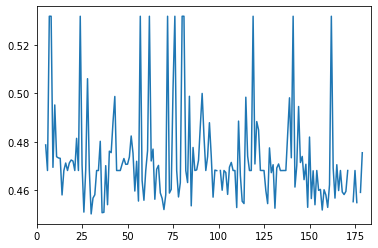

In [372]:
#plot the loss over time (opposite of accuracy)
x.iloc[:]['loss'].plot.line()